# Linear Models for Classification Problems

At this time, we are also interested in linear models, but now for solving classification problems.

Linear Models for classification assumes the following format:

y_hat = w[0]*x[0] + ... + w[p]*x[p] + b > 0

in which, y_hat is the predicted target value, p is the number of features, w and b are the set of parameters (slope and error, respectively) and x is the set of features. The role of a ML algorithm is to identify optimal values for each w[p].

When y_hat < 0, we predict the class -1 and when y > 0 we predict 1. Here, the decision boundary is a linear function of the input.

## Examples with the Wisconsin dataset

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
cancer = load_breast_cancer()
X,y = cancer.data, cancer.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### LogisticRegression

In [19]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [20]:
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.97


Although 0.97 is a good performance, training and test set scores are very close. This can be an indication of underfitting. Therefore, we should try to adjust the bias-variance trade-off. We can do this by changing the parameter C. Higher values for C, corresponds to less regularization.

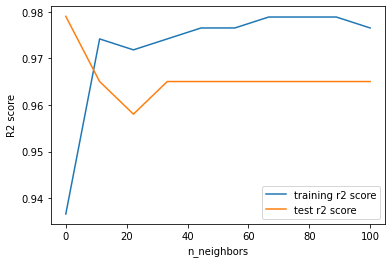

In [53]:
training_r2 = []
test_r2 = []

alpha_range = [round (x,4) for x in np.linspace(0.001, 100, 10).reshape(-1, 1).ravel().tolist()]

for alpha in alpha_range:
    clf = LogisticRegression(C=alpha, max_iter=5000, n_jobs=-1)
    clf.fit(X_train, y_train)
    training_r2.append(clf.score(X_train, y_train))
    test_r2.append(clf.score(X_test, y_test))

plt.plot(alpha_range, training_r2, label="training r2 score")
plt.plot(alpha_range, test_r2, label="test r2 score")
plt.ylabel("R2 score")
plt.xlabel("n_neighbors")
plt.legend();

In [58]:
logreg = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.977
Test set score: 0.965


As expected, with less regularization we found a better (linear) model. It's also interesting to point out that, it is possible to use L1 regularization in LogisticRegression. Therefore, we can induce models that uses only a subset of the original features.

In [73]:
logreg = LogisticRegression(C=100, penalty='l1', solver ='liblinear', max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.988
Test set score: 0.972


In [75]:
print("\nNumber of features (original): {}".format(X.shape[1]))
print("Number of features used: {}".format(np.sum(logreg.coef_ != 0)))


Number of features (original): 30
Number of features used: 21


LogisticRegression with L1 regularization uses only 21 of 30 features, while providing a higher accuracy.